In [586]:
import pandas as pd
import numpy as np

In [587]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", sep=',', names = ['Class Name','handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])

In [588]:
df.columns

Index(['Class Name', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

# Challenge 1

In [589]:
df.replace('n', 0, inplace=True)
df.replace('y', 1, inplace=True)

In [590]:
for col in df.columns:
    df[col].replace('?', len(df[df[col] == 1])/len(df), inplace=True)

In [591]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.000000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.344828,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.000000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.618391
2,democrat,0.429885,1.0,1.0,0.406897,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.000000,1.0,1.0,0.000000,0.487356,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.000000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.393103,1.0,1.0,1.0,1.000000


# Challenge 2

In [592]:
from sklearn.cross_validation import train_test_split

In [593]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df['Class Name'], test_size=0.30, random_state=4444)


# Challenge 3

In [594]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [595]:
acc = []
for k in range(1, 21):
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
print(sorted(list(zip(acc, range(1, 21))), reverse=True)[0])
    

(0.93129770992366412, 11)


k=11 is the highest accuracy

# Challenge 4

In [596]:
from sklearn.linear_model import LogisticRegression

In [597]:
lr = LogisticRegression()

In [598]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)
log_acc

0.93893129770992367

Accuracy of logisticRegression model is 0.93893129770992367

# Challenge 5

In [599]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

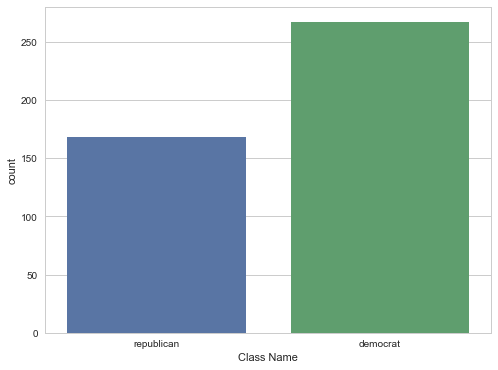

In [600]:
plt.rc("figure", figsize=(8, 6))
sns.set_style("whitegrid")
sns.countplot(x='Class Name', data=df);

In [601]:
def pred_dem(X):
    return ['democrat']*len(X)
def pred_rep(X):
    return ['republican']*len(X)

In [602]:
y_pred = pred_dem(X_test)
dem_acc = accuracy_score(y_test, y_pred)
print(dem_acc)

0.587786259542


In [603]:
y_pred = pred_rep(X_test)
rep_acc = accuracy_score(y_test, y_pred)
print(rep_acc)

0.412213740458


democratic predictor resulted in accuracy of 0.587786259542   
republican predictor resulted in accuracy of 0.412213740458

# Challenge 6

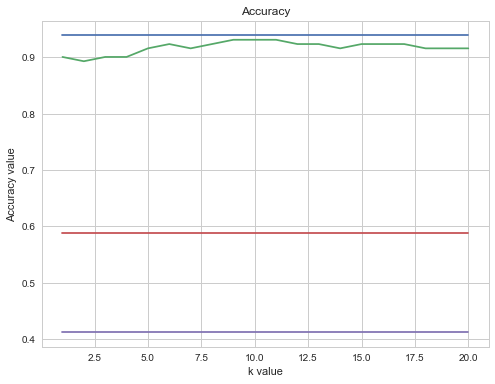

In [261]:
#fig, axs = plt.subplots(ncols=3)
fig, axs = plt.subplots()
sns.set_style("whitegrid")
plt.title("Accuracy")
plt.ylabel("Accuracy value")
plt.xlabel("k value")
plt.plot(range(1,21), [log_acc]*20)
plt.plot(range(1,21), acc)
plt.plot(range(1,21), [dem_acc]*20)
plt.plot(range(1,21), [rep_acc]*20);

# Challenge 7

In [262]:
from sklearn.learning_curve import learning_curve

In [263]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/bekcunning/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

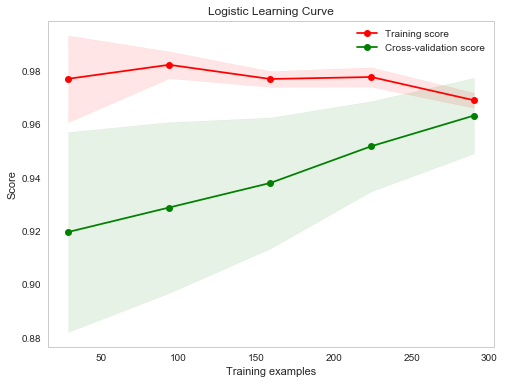

In [264]:
estimator = LogisticRegression()
plot_learning_curve(estimator, "Logistic Learning Curve",df.iloc[:,1:], df['Class Name'])

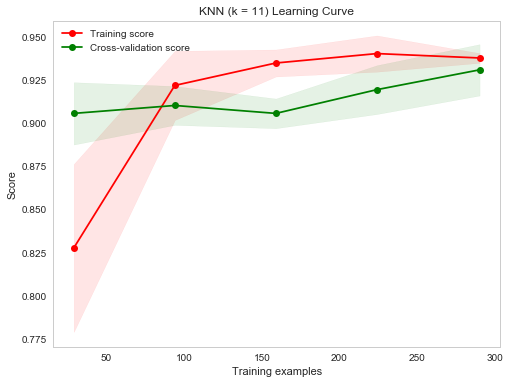

In [265]:
estimator = KNeighborsClassifier(11)
plot_learning_curve(estimator, "KNN (k = 11) Learning Curve",df.iloc[:,1:], df['Class Name']);

# Challenge 8

In [266]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [267]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
gnb_acc = accuracy_score(y_test, y_pred)
gnb_acc

0.94656488549618323

Accuracy of GaussianNB: 0.94656488549618323

In [268]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
svc_acc

0.95419847328244278

Accuracy of SVC: 0.95419847328244278

In [269]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, y_pred)
dtc_acc

0.94656488549618323

Accuracy of DecisionTreeClassifier: 0.94656488549618323

In [270]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, y_pred)
rfc_acc

0.93893129770992367

Accuracy of RandomForestClassifier: 0.93893129770992367

# Challenge 9

In [271]:
from sklearn.cross_validation import cross_val_score

In [605]:
X = df.iloc[:,1:]
y = df['Class Name']
print('Accuracy for each classifier:')
print('GaussianNB', cross_val_score(gnb, X, y).mean())
print('SVC', cross_val_score(svc, X, y).mean())
print('DecisionTreeClassifier', cross_val_score(dtc, X, y).mean())
print('RandomForestClassifier', cross_val_score(rfc, X, y).mean())


Accuracy for each classifier:
GaussianNB 0.933333333333
SVC 0.954022988506
DecisionTreeClassifier 0.947126436782
RandomForestClassifier 0.967816091954


# Challenge 10

In [606]:
df2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data", sep=',', names = ['Class Name','handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa'])

In [607]:
df2.replace('n', 0, inplace=True)
df2.replace('y', 1, inplace=True)

In [608]:
del df2['Class Name']

In [609]:
for col in df2.columns:
    df2.replace('?', df2[col].mode()[0], inplace=True)

In [610]:
df2.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [611]:
X_ = df2.loc[:, df2.columns != 'religious-groups-in-schools']
y_ = df2['religious-groups-in-schools']

In [612]:
lr = LogisticRegression()

In [632]:
print('Cross validation accuracy of this model:')
cross_val_score(lr, X_, y_).mean()

Cross validation accuracy of this model:


0.82748604769152723

# Challenge 11

In [614]:
movies = pd.DataFrame.from_csv('../sf17_ds8/challenges/challenges_data/2013_movies.csv')
movies = movies[movies['Budget'].notnull()]
mX = movies[['Budget', 'DomesticTotalGross', 'Runtime']]
my = movies['Rating']

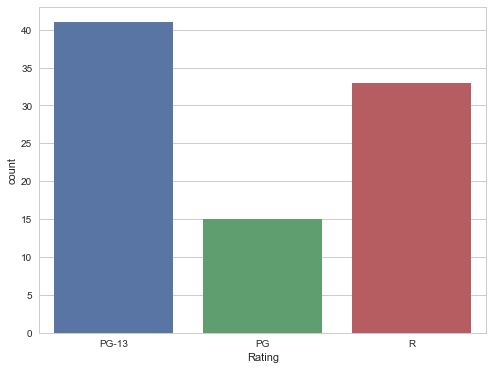

In [615]:
sns.countplot('Rating', data=movies)

In [440]:
mX_train, mX_test, my_train, my_test = train_test_split(mX,my, test_size=0.30, random_state=4444)

In [446]:
def stupid_predictor(X):
    return ['PG-13']*len(X)

In [454]:
stupid_y = stupid_predictor(mX_test)
stupid_acc = accuracy_score(my_test, stupid_y)

In [453]:
mX.head()

,Budget,DomesticTotalGross,Runtime
Title,,,
The Hunger Games: Catching Fire,130000000.0,424668047,146
Iron Man 3,200000000.0,409013994,129
Frozen,150000000.0,400738009,108
Despicable Me 2,76000000.0,368061265,98
Man of Steel,225000000.0,291045518,143


In [441]:
accm = []
for k in range(1, 21):
    kn = KNeighborsClassifier(n_neighbors=k)
    kn.fit(mX_train, my_train)
    my_pred = kn.predict(mX_test)
    accm.append(accuracy_score(my_test, my_pred))
print(sorted(list(zip(accm, range(1, 21))), reverse=True)[0])



(0.51851851851851849, 14)


In [442]:
mlr = LogisticRegression()

In [443]:
mlr.fit(mX_train, my_train)
my_pred_lr = mlr.predict(mX_test)
accuracy_score(my_test, my_pred_lr)

0.48148148148148145

In [455]:
stupid_acc

0.44444444444444442

Baseline predicts with 0.4444 accuracy   
Logistic regression is slightly better with 0.48148 accuracy   
KNN wins with .5185 accuracy

In [616]:
mlr.coef_

array([[ -3.99723246e-09,  -9.31976740e-09,  -1.04210267e-13],
       [  9.62798957e-09,  -3.93653307e-09,  -5.51148928e-14],
       [ -2.11481432e-08,   5.08501166e-09,   1.18139138e-13]])

As far as I can tell these coefficients don't do much.  They are all very small.

# Challenge 12

In [617]:
cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", sep=',', names = ['Age','year_operated', 'Nodes', 'survival_status'])

In [618]:
cancer.head()

,Age,year_operated,Nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [620]:
print("Patient average age")
cancer.Age.mean()

Patient average age


52.45751633986928

In [621]:
print("Age std deviation")
cancer.Age.std()

Age std deviation


10.80345234930328

In [622]:
print("Survived avg age:")
cancer[cancer['survival_status'] == 1].Age.mean()

Survived avg age:


52.01777777777778

In [623]:
print("Survived std deviation")
cancer[cancer['survival_status'] == 1].Age.std()

Survived std deviation


11.012154179929546

In [624]:
print("Didn't survive avg age")
cancer[cancer['survival_status'] == 2].Age.mean()

Didn't survive avg age


53.67901234567901

In [625]:
print("Didn't survive std deviation")
cancer[cancer['survival_status'] == 2].Age.std()

Didn't survive std deviation


10.16713720829741

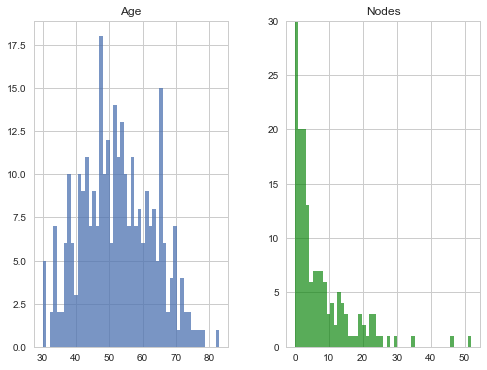

In [565]:
fig, axes = plt.subplots(1, 2)
cancer.hist('Age', bins=50, alpha=0.75, ax=axes[0])
cancer.hist('Nodes', bins=50, color='g', alpha=0.65, ax=axes[1])
plt.ylim(0, 30);

In [629]:
print("earliest year for surgery")
print(1900+cancer.year_operated.min())

earliest year for surgery
1958


In [628]:
print("Most recent year for surgery")
print(1900+cancer.year_operated.max())

Most recent year for surgery
1969


In [569]:
cX_train, cX_test, cy_train, cy_test = train_test_split(cancer.iloc[:,cancer.columns != 'survival_status'],cancer['survival_status'], test_size=0.30, random_state=4444)


In [630]:
clr = LogisticRegression()
clr.fit(cX_train, cy_train)
cy_pred = clr.predict(cX_test)
print("Logistic Regression accuracy")
accuracy_score(cy_test, cy_pred)

Logistic Regression accuracy


0.81521739130434778

In [631]:
print("Logistic regression coefficients")
clr.coef_

Logistic regression coefficients


array([[ 0.0155515 , -0.02899279,  0.07136197]])

In [578]:
coefs = list(zip(clr.coef_[0], cX_train.columns))

In [581]:
sorted(coefs, reverse=True)

[(0.071361965504665614, 'Nodes'),
 (0.015551502481860288, 'Age'),
 (-0.028992790586247961, 'year_operated')]

Nodes are the highest indicator followed by age and year operated

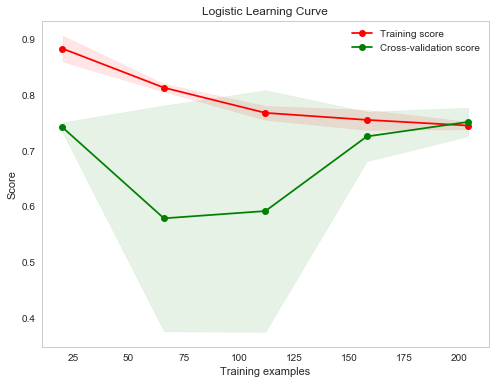

In [583]:
estimator = LogisticRegression()
plot_learning_curve(estimator, "Logistic Learning Curve",cancer.iloc[:,cancer.columns != 'survival_status'], cancer['survival_status']);